# Sistemas Inteligentes

## Exercício Computacional 3 - Redução de Dimensionalidade e Regressão

### Identificação do Aluno

#### Nome Completo

WILLIAM DE SOUZA GOMES

#### RA

11201720874

## Instruções

Pesquise por datasets voltados para regressões que estejam disponíveis na biblioteca Scikit, então escolha um para este exercício.

Utilize algum método de redução de dimensionalidade para realizar tal processo, então gere três modelos de regressão com diferentes métodos (um método diferente para cada modelo).

Calcule e exiba métricas que ajudem a conferir a qualidade dos modelos gerados.

Exiba gráficos que auxiliem na visualização dos dados e da curva de regressão.

Compare os modelos e comente os resultados obtidos.

Insira as referências utilizadas ao final.

## Desenvolvimento

##### Importando bibliotecas para EC3

In [1]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap, TSNE
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge, Ridge, LassoLars, theil_sen, RANSACRegressor
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##### Importando dataset  Boston

In [2]:
from sklearn.datasets import load_boston
db = load_boston()

### Entendendo Dataset

##### Informação dos atributos. Como temos 13 dimensões então há 8 atributos
1. CRIM     per capita crime rate by town
2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS    proportion of non-retail business acres per town
4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX      nitric oxides concentration (parts per 10 million)
6. RM       average number of rooms per dwelling
7. AGE      proportion of owner-occupied units built prior to 1940
8. DIS      weighted distances to five Boston employment centres
9. RAD      index of accessibility to radial highways
10. TAX      full-value property-tax rate per 10,000.
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in 1000's

In [3]:
labels = db.feature_names
print(labels)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


##### Descrição completa do dataset

In [4]:
desc = db.DESCR
print(desc)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

##### Criando nosso Dataframe ou seja separando o data e o target. Usamos aqui tanto pelo Pandas quanto pelo função nativa do python

In [5]:
df_x = pd.DataFrame(db.data, columns= db.feature_names)
df_y = pd.DataFrame(db.target)

X = db.data
y = db.target

#####  Conferindo dimensões do data (X) e target (y)

In [6]:
print('Shape X: {}'.format(df_x.shape))
print('Shape y: {}'.format(df_y.shape))
#X_reduzido = X[:100].copy()
#y_reduzido = y[:100].copy()

Shape X: (506, 13)
Shape y: (506, 1)


In [7]:
df_x.describe(include='all')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


##### Redução de dimensionalidade

In [8]:
#PCA
pca = PCA(n_components=1)
pca = pca.fit_transform(df_x)

In [9]:
#FastIca
fast_ica = FastICA(n_components=1)
fast_ica = fast_ica.fit_transform(df_x)

In [10]:
#Isomap
isomap = Isomap(n_components=1)
isomap = isomap.fit_transform(df_x)

In [11]:
#TSNE
tsne = TSNE(n_components=1)
tsne = tsne.fit_transform(df_x)

In [12]:
print('Shape PCA: {}'.format(pca.shape))
print('Shape FastIca: {}'.format(fast_ica.shape))
print('Shape Isomap: {}'.format(isomap.shape))
print('Shape Isomap: {}'.format(isomap.shape))

Shape PCA: (506, 1)
Shape FastIca: (506, 1)
Shape Isomap: (506, 1)
Shape Isomap: (506, 1)


### Least Squares

##### O treinamento para o Least Squares será usado o método PCA

In [13]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca, df_y, test_size = .20)
reg = LinearRegression().fit(X_train_pca, y_train_pca)
y_pred_pca = reg.predict(X_test_pca)

##### Para Isomap

In [14]:
X_train_isomap, X_test_isomap, y_train_isomap, y_test_isomap = train_test_split(isomap, df_y, test_size = .20)
reg = LinearRegression().fit(X_train_isomap, y_train_isomap)
y_pred_isomap = reg.predict(X_test_isomap)

##### Conferindo as métricas R2 e MSE

In [15]:
print("PCA")
print('mean squared error: {} '.format(round(mse(y_pred_pca, y_test_pca), 2)))
print('R2: {}'.format(round(r2(y_test_pca, y_pred_pca), 4))) 
print("Isomap")
print('mean squared error: {} '.format(round(mse(y_pred_isomap, y_test_isomap), 2)))
print('R2: {}'.format(round(r2(y_test_isomap, y_pred_isomap), 4))) 

PCA
mean squared error: 60.3 
R2: 0.304
Isomap
mean squared error: 79.11 
R2: 0.0571


#####  Gráfico de dispersão dos dados de teste e a curva de regressão gerada.

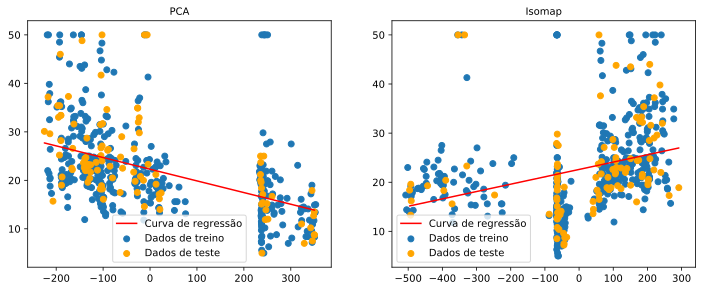

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [12, 10], 
          'axes.labelsize': 10,
          'axes.titlesize':10, 
          'font.size': 10,
          'legend.fontsize': 10, 
          'xtick.labelsize': 10, 
          'ytick.labelsize': 10
         }

plt.rcParams.update(params)

plt.subplot(221)
plt.scatter(X_train_pca,y_train_pca)
plt.scatter(X_test_pca,y_test_pca, c = 'orange')
plt.plot(X_test_pca, y_pred_pca, 'r')
plt.legend(['Curva de regressão','Dados de treino', 'Dados de teste'])
plt.title('PCA')

plt.subplot(222)
plt.scatter(X_train_isomap,y_train_isomap)
plt.scatter(X_test_isomap,y_test_isomap, c = 'orange')
plt.plot(X_test_isomap, y_pred_isomap, 'r')
plt.legend(['Curva de regressão','Dados de treino', 'Dados de teste'])
plt.title('Isomap')

plt.show()

### LASSO

##### O treinamento para o Lasso será usado o método Isomap

In [17]:
X_train_isomap, X_test_isomap, y_train_isomap, y_test_isomap = train_test_split(isomap, df_y, test_size = .20)
reg = Lasso().fit(X_train_isomap, y_train_isomap)
y_pred_isomap = reg.predict(X_test_isomap)


##### Para PCA

In [18]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca, df_y, test_size = .20)
reg = Lasso().fit(X_train_pca, y_train_pca)
y_pred_pca = reg.predict(X_test_pca)

##### Conferindo as métricas R2 e MSE

In [19]:
print("Isomap")
print('mean squared error: {} '.format(round(mse(y_pred_isomap, y_test_isomap), 2)))
print('R2: {}'.format(round(r2(y_test_isomap, y_pred_isomap), 4))) 
print("PCA")
print('mean squared error: {} '.format(round(mse(y_pred_pca, y_test_pca), 2)))
print('R2: {}'.format(round(r2(y_test_pca, y_pred_pca), 4))) 



Isomap
mean squared error: 88.48 
R2: -0.0128
PCA
mean squared error: 54.5 
R2: 0.3298


#####  Gráfico de dispersão dos dados de teste e a curva de regressão gerada.

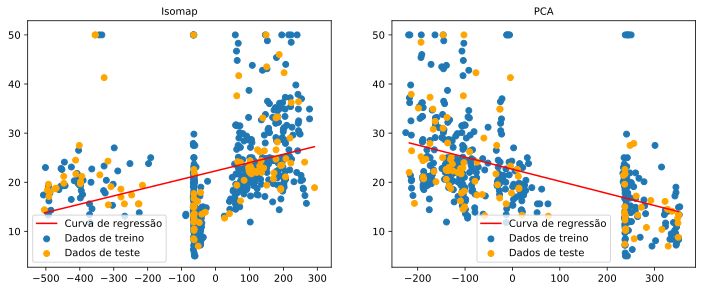

In [20]:
plt.subplot(221)
plt.scatter(X_train_isomap,y_train_isomap)
plt.scatter(X_test_isomap,y_test_isomap, c = 'orange')
plt.plot(X_test_isomap, y_pred_isomap, 'r')
plt.legend(['Curva de regressão','Dados de treino', 'Dados de teste'])
plt.title('Isomap')

plt.subplot(222)
plt.scatter(X_train_pca,y_train_pca)
plt.scatter(X_test_pca,y_test_pca, c = 'orange')
plt.plot(X_test_pca, y_pred_pca, 'r')
plt.legend(['Curva de regressão','Dados de treino', 'Dados de teste'])
plt.title('PCA')

plt.show()

### Ridge

##### O treinamento para o Lasso será usado o método Isomap

In [21]:
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(tsne, df_y, test_size = .20)
reg = Ridge().fit(X_train_tsne, y_train_tsne)
y_pred_tsne = reg.predict(X_test_tsne)

##### Para PCA

In [22]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca, df_y, test_size = .20)
reg = Ridge().fit(X_train_pca, y_train_pca)
y_pred_pca = reg.predict(X_test_pca)

##### Conferindo as métricas R2 e MSE

In [23]:
print("TSNE")
print('mean squared error: {} '.format(round(mse(y_pred_tsne, y_test_tsne), 2)))
print('R2: {}'.format(round(r2(y_test_tsne, y_pred_tsne), 4))) 

print("PCA")
print('mean squared error: {} '.format(round(mse(y_pred_pca, y_test_pca), 2)))
print('R2: {}'.format(round(r2(y_test_pca, y_pred_pca), 4))) 

TSNE
mean squared error: 112.5 
R2: -0.0133
PCA
mean squared error: 59.66 
R2: 0.2696


#####  Gráfico de dispersão dos dados de teste e a curva de regressão gerada.

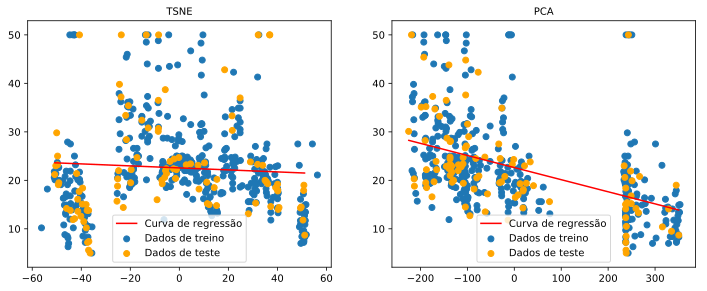

In [24]:
plt.subplot(221)
plt.scatter(X_train_tsne,y_train_tsne)
plt.scatter(X_test_tsne,y_test_tsne, c = 'orange')
plt.plot(X_test_tsne, y_pred_tsne, 'r')
plt.legend(['Curva de regressão','Dados de treino', 'Dados de teste'])
plt.title('TSNE')

plt.subplot(222)
plt.scatter(X_train_pca,y_train_pca)
plt.scatter(X_test_pca,y_test_pca, c = 'orange')
plt.plot(X_test_pca, y_pred_pca, 'r')
plt.legend(['Curva de regressão','Dados de treino', 'Dados de teste'])
plt.title('PCA')

plt.show()

### Treinamento sem redução de dimensionalidade.

##### Least Squares

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = .20)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

##### Conferindo métricas

In [48]:
print('mean squared error: {} '.format(round(mse(y_pred, y_test), 2)))
print('R2: {}'.format(round(r2(y_test, y_pred), 4))) 

mean squared error: 23.32 
R2: 0.6986


##### Lasso

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = .20)
reg = Lasso().fit(X_train, y_train)
y_pred = reg.predict(X_test)

#####  Conferindo métricas

In [50]:
print('mean squared error: {} '.format(round(mse(y_pred, y_test), 2)))
print('R2: {}'.format(round(r2(y_test, y_pred), 4))) 

mean squared error: 39.89 
R2: 0.5911


#### Discussão Geral

   Foi usado para este treinamento o dataset Boston disponibilizado pelo próprio sklearn e neste dataset e para o problema na qual queremos obter - valor de um imóvel dado os parâmetros de entrada - a melhor forma é utilizando regressão. No dataset presente temos um total de 13 parâmetros e usamos técnica de redução de dimensionalidade.
   A redução de dimensionalidade não se mostrou tão boa quanto a escolha de manter todas as dimensões do dataset. Como podemos ver a métrica R2 indica 0,69 para o Least Squares e 0,59 para o Lasso enquanto para o melhor resultado dos mesmos quando foi usado o PCA resultou em 0,26 e 0,11, respectivamente. 
   Isso não é um resultado bom como poderíamos esperar dado o propósito do uso da redução de dimensionalidade: nem todas as features são revelantes para o problema, altas dimensões podem causar overfitting.
   Mas pelos resultados obtidos as features são importantes para a regressão, não foi feita a correlação das features para se conferir quais tem maior peso, mas os dados não indicam a queda da acurácia do modelo.


## Referências


http://scikit-learn.org/stable/datasets/

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston

http://www.estruturas.ufpr.br/disciplinas/pos-graduacao/introducao-a-computacao-cientifica-com-python/introducao-python/2-1-o-objeto-array-do-numpy/

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html